## Dataset

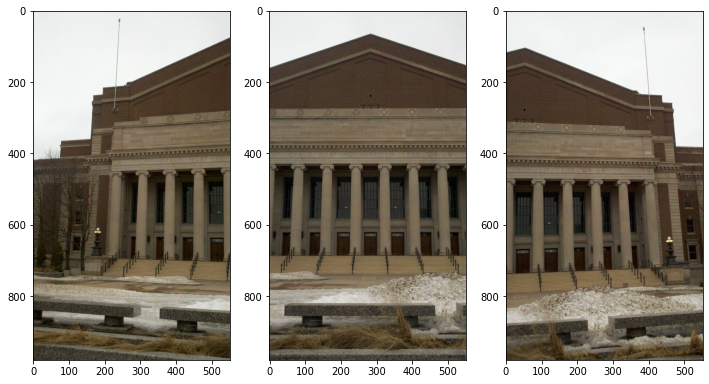

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

## Steps for image stitching:

    1. Detecting keypoints and extracting local invariant descriptors from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3

In [2]:
# Import the required packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

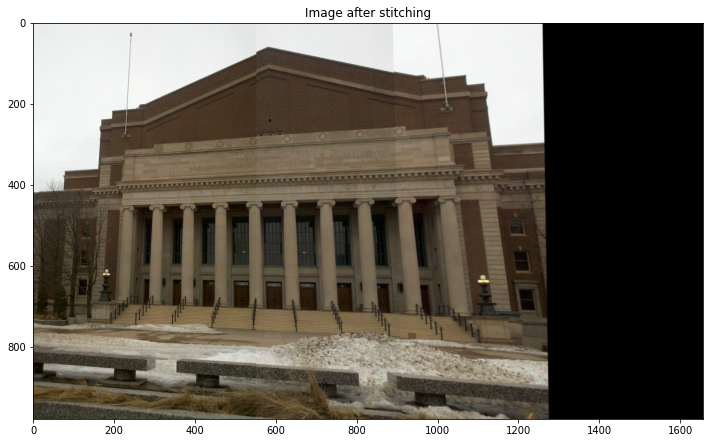

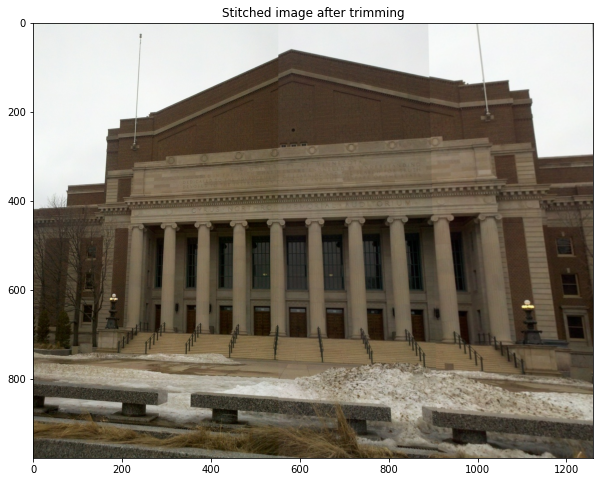

In [3]:
# Helper function to trim the black part from the stitched image
def trim(image):
    height, width = image.shape[:2]
    top_right = 0
    for i in range(width-1,-1, -1):
        if image[0,i,0] != 0 and image[0,i,1] != 0 and image[0,i,2] != 0:
            top_right = i
            break
    
    # return the trimmed image
    out_image = image[:, :top_right, :]
    return out_image

# Function to stitch two images left and right
def image_stitch(left, right):
    # 1. Detecting ORB keypoints and extracting local invariant descriptors from two input images
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(left, None)
    kp2, des2 = orb.detectAndCompute(right, None)

    # 2. Matching the descriptors between the images
    # Define a brute force matcher and find matches
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)

    # find the top 7 good matches
    good_matches = sorted(matches, key = lambda x:x.distance)[:7]

    # Get the x,y coordinates from the keypoints for both
    points_left = [kp1[m.queryIdx].pt for m in good_matches]
    points_right = [kp2[m.trainIdx].pt for m in good_matches]

    # 3. Estimate a homography matrix using our matched feature vectors
    H, _ = cv2.findHomography(np.float32(points_right), np.float32(points_left))
    
    # 4. Applying a warping transformation using the homography matrix obtained from Step #3
    warped = cv2.warpPerspective(right, H, (left.shape[1] + right.shape[1], max(left.shape[0], right.shape[0])))

    comb = warped.copy()
    comb[0:left.shape[0],0:left.shape[1]] = left

    # 5. Trim the image
    trimmed_comb = trim(comb)

    # return both final image and trimmed image
    return comb, trimmed_comb

# Read the three images
img1 = cv2.imread("./Images/mall1.jpg")
img2 = cv2.imread("./Images/mall2.jpg")
img3 = cv2.imread("./Images/mall3.jpg")

# Stitch all three images using image_stitch function
img1_2_3, trimmed_img1_2_3 = image_stitch(img1, image_stitch(img2, img3)[0])
img1_2_3 = cv2.cvtColor(img1_2_3, cv2.COLOR_BGR2RGB) # joined image
trimmed_img1_2_3 = cv2.cvtColor(trimmed_img1_2_3, cv2.COLOR_BGR2RGB) # trimmed image

# plot both the images
plt.title("Image after stitching")
plt.imshow(img1_2_3)
plt.show()

plt.title("Stitched image after trimming")
plt.imshow(trimmed_img1_2_3)
plt.show()
